In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url_path = 'https://raw.githubusercontent.com/edenjacob/ProjectRinaEden/e46a69a90cb1e6abbbd3ec1b50c4e94ea6d6e054/ALL%20NATURAL%20DISASTERS.csv'
read_file = pd.read_csv(url_path, encoding='ISO-8859-1')

In [3]:
read_file.shape #return tupple of the rows, columns number.

(16126, 45)

In [4]:
read_file.columns #return all columns names into list

Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [5]:
read_file #present the whole data

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16121,2021,449,FL-2021-000110,Natural,Hydrological,Flood,NaN,NaN,NaN,Yemen,...,67980.0,NaN,67980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16122,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,South Africa,...,400.0,NaN,400.0,NaN,75000.0,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
16123,2021,599,EP-2021-000138,Natural,Biological,Epidemic,Viral disease,NaN,Meningitis,Congo (the Democratic Republic of the),...,NaN,NaN,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16124,2021,20,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Serbia,...,22.0,NaN,22.0,NaN,NaN,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."


In [6]:
read_file.info() #general information about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [7]:
disaster_types = read_file['Disaster Type'].unique() #return list of each value in Disaster Type column
disaster_types

array(['Drought', 'Earthquake', 'Volcanic activity',
       'Mass movement (dry)', 'Storm', 'Flood', 'Epidemic', 'Landslide',
       'Wildfire', 'Extreme temperature ', 'Fog', 'Insect infestation',
       'Impact', 'Animal accident', 'Glacial lake outburst'], dtype=object)

In [8]:
first_year = read_file['Year'].iloc[0]
last_year = read_file['Year'].iloc[-1]
years = last_year - first_year
print('first year: ',first_year)
print('last year: ',last_year)
print('Total: ',years)

first year:  1900
last year:  2021
Total:  121


In [9]:
read_file.isnull().sum() # מראה כמה ערכים חסרים יש לנו בכל עמודה

Year                              0
Seq                               0
Glide                         14545
Disaster Group                    0
Disaster Subgroup                 0
Disaster Type                     0
Disaster Subtype               3110
Disaster Subsubtype           15049
Event Name                    12265
Country                           0
ISO                               0
Region                            0
Continent                         0
Location                       1792
Origin                        12332
Associated Dis                12778
Associated Dis2               15419
OFDA Response                 14432
Appeal                        13557
Declaration                   12870
Aid Contribution              15449
Dis Mag Value                 11180
Dis Mag Scale                  1190
Latitude                      13397
Longitude                     13394
Local Time                    15023
River Basin                   14839
Start Year                  

In [10]:
read_file.dtypes


Year                            int64
Seq                             int64
Glide                          object
Disaster Group                 object
Disaster Subgroup              object
Disaster Type                  object
Disaster Subtype               object
Disaster Subsubtype            object
Event Name                     object
Country                        object
ISO                            object
Region                         object
Continent                      object
Location                       object
Origin                         object
Associated Dis                 object
Associated Dis2                object
OFDA Response                  object
Appeal                         object
Declaration                    object
Aid Contribution              float64
Dis Mag Value                 float64
Dis Mag Scale                  object
Latitude                       object
Longitude                      object
Local Time                     object
River Basin 

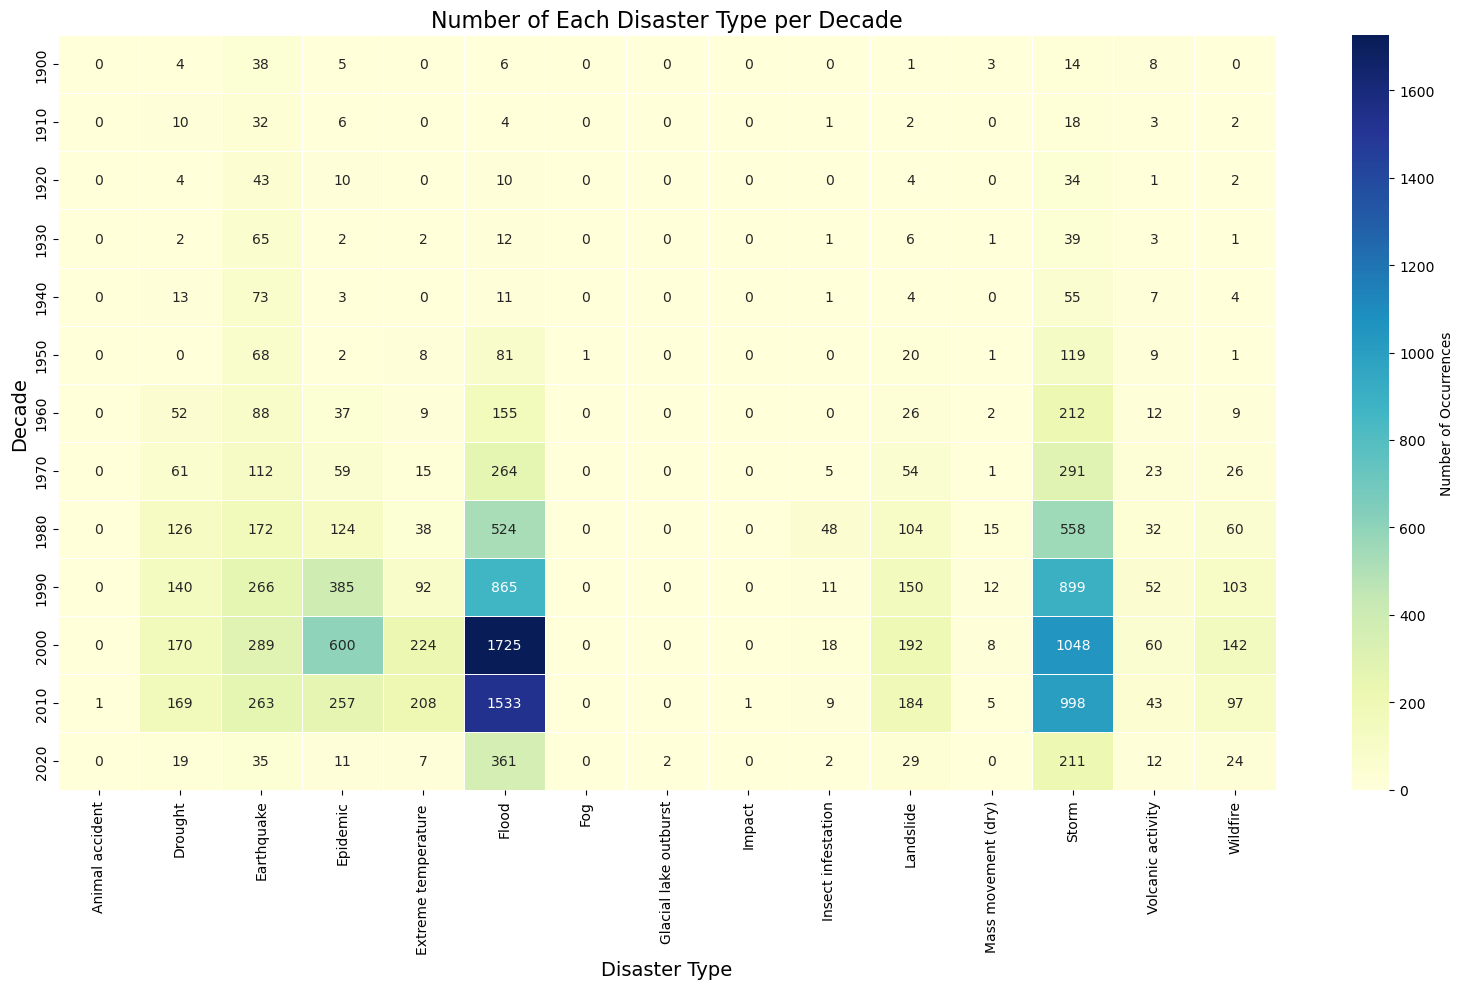

In [11]:
# Grouping by Year and Disaster Type, then counting the occurrences
disaster_counts = read_file.groupby(['Year', 'Disaster Type']).size().reset_index(name='Count')

# Round down the year to the nearest decade
disaster_counts['Decade'] = disaster_counts['Year'] // 10 * 10

# Group by Decade and Disaster Type, summing the counts
disaster_counts_decade = disaster_counts.groupby(['Decade', 'Disaster Type'])['Count'].sum().reset_index()

# Pivot the data
pivot_table = disaster_counts_decade.pivot(index='Decade', columns='Disaster Type', values='Count').fillna(0)

# Convert counts to integers
pivot_table = pivot_table.astype(int)

# Plotting with seaborn heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Occurrences'})

# Adding labels and title
plt.xlabel('Disaster Type', fontsize=14)
plt.ylabel('Decade', fontsize=14)
plt.title('Number of Each Disaster Type per Decade', fontsize=16)

# Displaying the plot
plt.tight_layout()
plt.show()


In [12]:

# read_file.fillna(0, inplace=True)


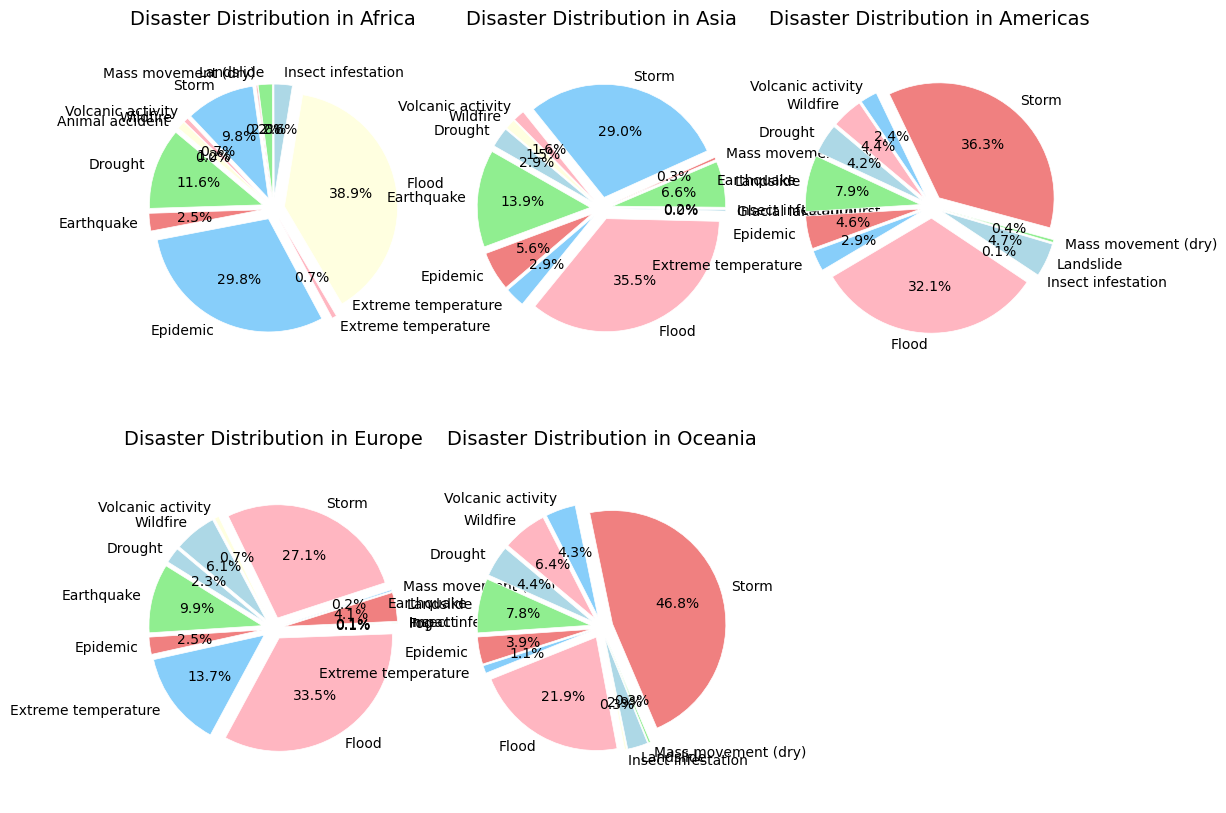

In [13]:
continent_disaster_counts = read_file.groupby(['Continent', 'Disaster Type']).size().reset_index(name='Count')

# Get unique continents
continents = read_file['Continent'].unique()

# Plotting pie charts for each continent
plt.figure(figsize=(12, 10))

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow']
explode = [0.1] * len(colors)  # Explode all slices slightly

num_rows = 2
num_cols = (len(continents) + num_rows - 1) // num_rows

for i, continent in enumerate(continents):
    # Filter data for current continent
    continent_data = continent_disaster_counts[continent_disaster_counts['Continent'] == continent]

    # Prepare data for pie chart
    labels = continent_data['Disaster Type']
    sizes = continent_data['Count']

    # Calculate subplot position
    plt.subplot(num_rows, num_cols, i + 1)

    # Adjust explode list length dynamically
    explode = [0.1] * len(sizes)  # Explode all slices slightly based on number of disaster types

    # Plot pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,
            wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'}, explode=explode)

    plt.title(f'Disaster Distribution in {continent}', fontsize=14)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# ... (rest of the code)

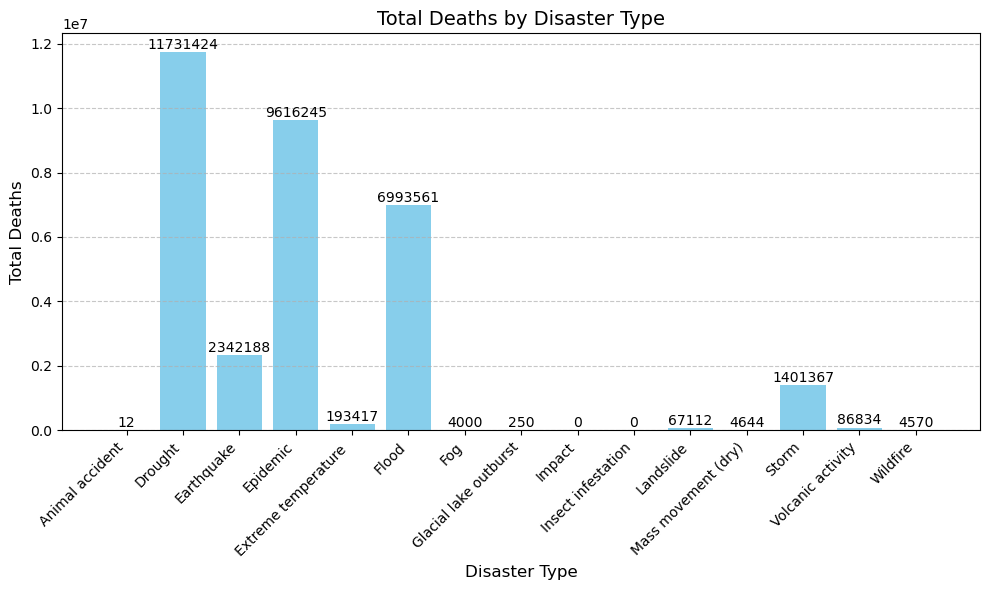

In [14]:
deaths_per_disaster = read_file.groupby('Disaster Type')['Total Deaths'].sum().reset_index()

# Plotting deaths per disaster type
plt.figure(figsize=(10, 6))
bars = plt.bar(deaths_per_disaster['Disaster Type'], deaths_per_disaster['Total Deaths'], color='skyblue')

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10000, int(yval), ha='center', va='bottom', fontsize=10)

# Customize plot
plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.title('Total Deaths by Disaster Type', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Show plot
plt.tight_layout()
plt.show()


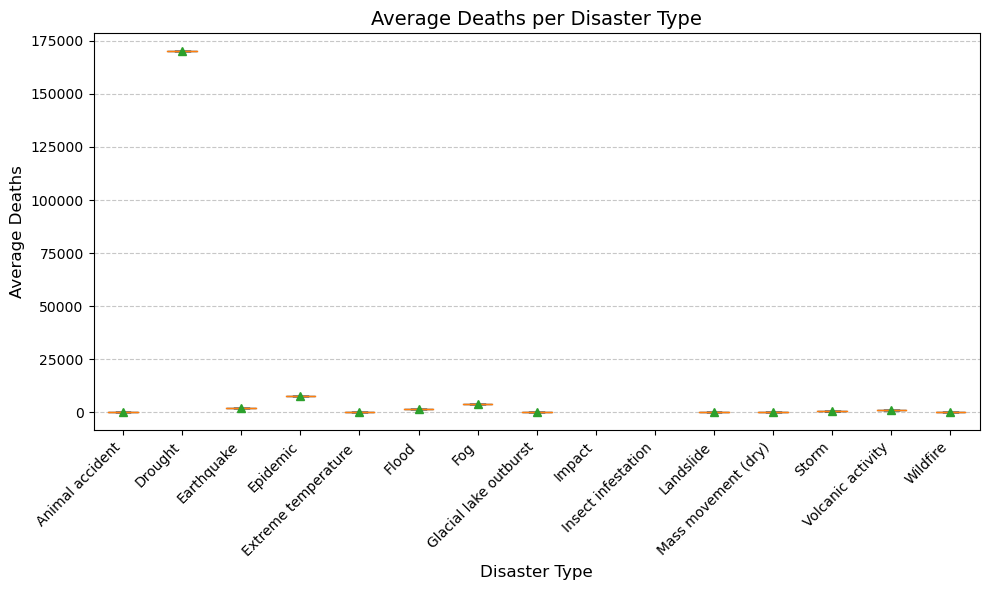

In [15]:
average_deaths_per_disaster = read_file.groupby('Disaster Type')['Total Deaths'].mean().reset_index()

# Plotting average deaths per disaster type (box plot)
plt.figure(figsize=(10, 6))
plt.boxplot([group['Total Deaths'] for name, group in average_deaths_per_disaster.groupby('Disaster Type')],
            labels=average_deaths_per_disaster['Disaster Type'], patch_artist=True, showmeans=True)

# Customize plot
plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Average Deaths', fontsize=12)
plt.title('Average Deaths per Disaster Type', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Show plot
plt.tight_layout()
plt.show()


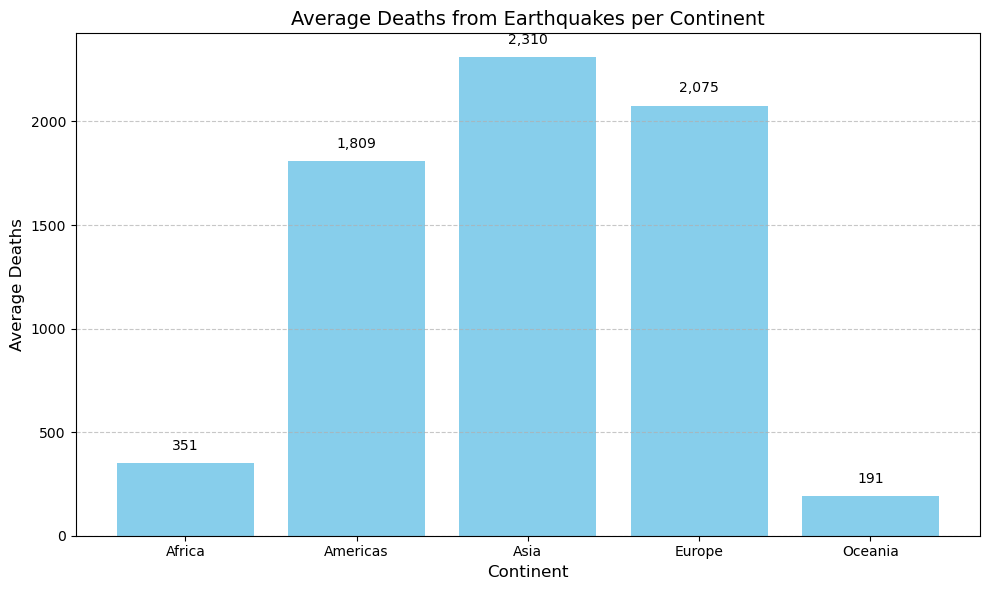

In [16]:
# Filter data for earthquakes
earthquake_data = read_file[read_file['Disaster Type'] == 'Earthquake']

# Group by Continent and calculate average Total Deaths
avg_deaths_per_continent = earthquake_data.groupby('Continent')['Total Deaths'].mean().reset_index()

# Plotting average deaths from earthquakes per continent
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_deaths_per_continent['Continent'], avg_deaths_per_continent['Total Deaths'], color='skyblue')

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{int(yval):,}', ha='center', va='bottom', fontsize=10)

# Customize plot
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Average Deaths', fontsize=12)
plt.title('Average Deaths from Earthquakes per Continent', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Show plot
plt.tight_layout()
plt.show()


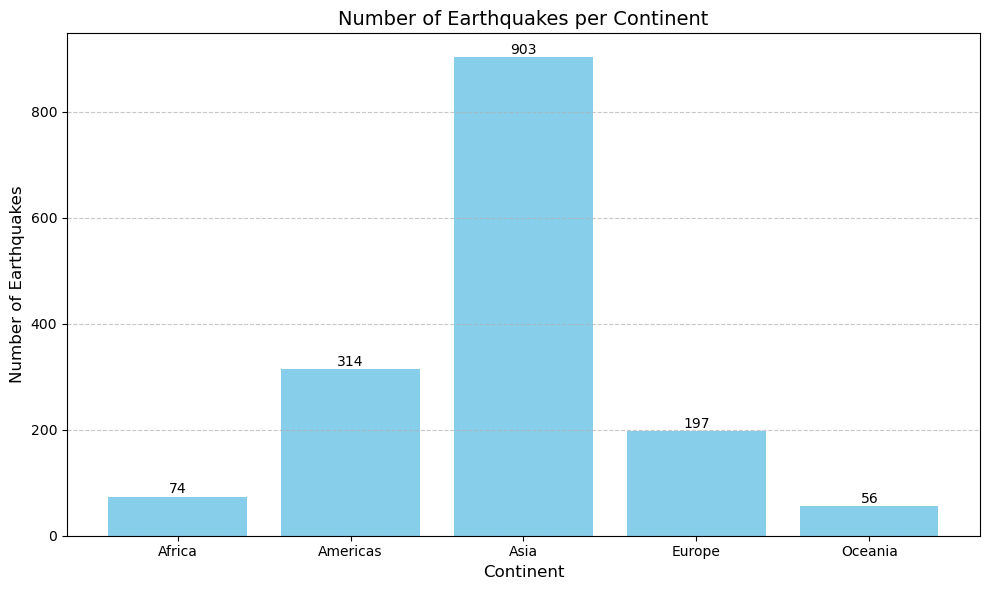

In [17]:
# Filter data for earthquakes
earthquake_data = read_file[read_file['Disaster Type'] == 'Earthquake']

# Group by Continent and count occurrences of earthquakes
earthquakes_per_continent = earthquake_data.groupby('Continent').size().reset_index(name='Earthquake Count')

# Plotting number of earthquakes per continent
plt.figure(figsize=(10, 6))
bars = plt.bar(earthquakes_per_continent['Continent'], earthquakes_per_continent['Earthquake Count'], color='skyblue')

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{int(yval):,}', ha='center', va='bottom', fontsize=10)

# Customize plot
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)
plt.title('Number of Earthquakes per Continent', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Show plot
plt.tight_layout()
plt.show()
#סיבה הגיונית להסבר התופעה הוא שאסיה הרבה יותר צפופה לקילומטר מרובע משאר היבשבות

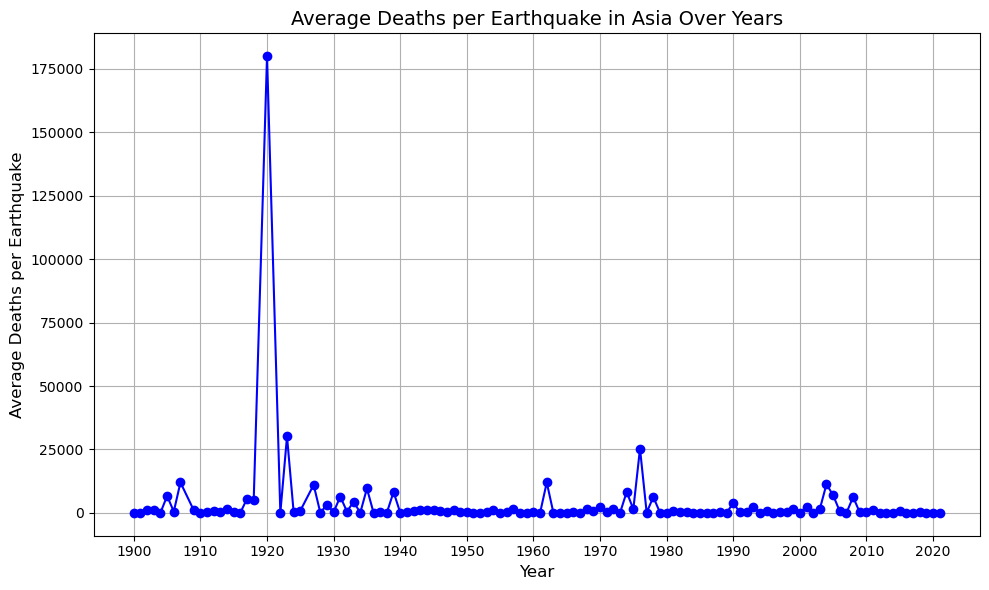

In [18]:

# Filter data for earthquakes in Asia
asia_earthquake_data = read_file[(read_file['Disaster Type'] == 'Earthquake') & (read_file['Continent'] == 'Asia')]

# Group by Year and calculate average Total Deaths per earthquake
avg_deaths_per_year = asia_earthquake_data.groupby('Year')['Total Deaths'].mean().reset_index()

# Plotting average deaths per earthquake over years
plt.figure(figsize=(10, 6))
plt.plot(avg_deaths_per_year['Year'], avg_deaths_per_year['Total Deaths'], marker='o', linestyle='-', color='b')

# Customize plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Deaths per Earthquake', fontsize=12)
plt.title('Average Deaths per Earthquake in Asia Over Years', fontsize=14)
plt.grid(True)

# Set x-axis ticks to show every 10 years
plt.xticks(range(min(avg_deaths_per_year['Year']), max(avg_deaths_per_year['Year']) + 1, 10))

# Show plot
plt.tight_layout()
plt.show()


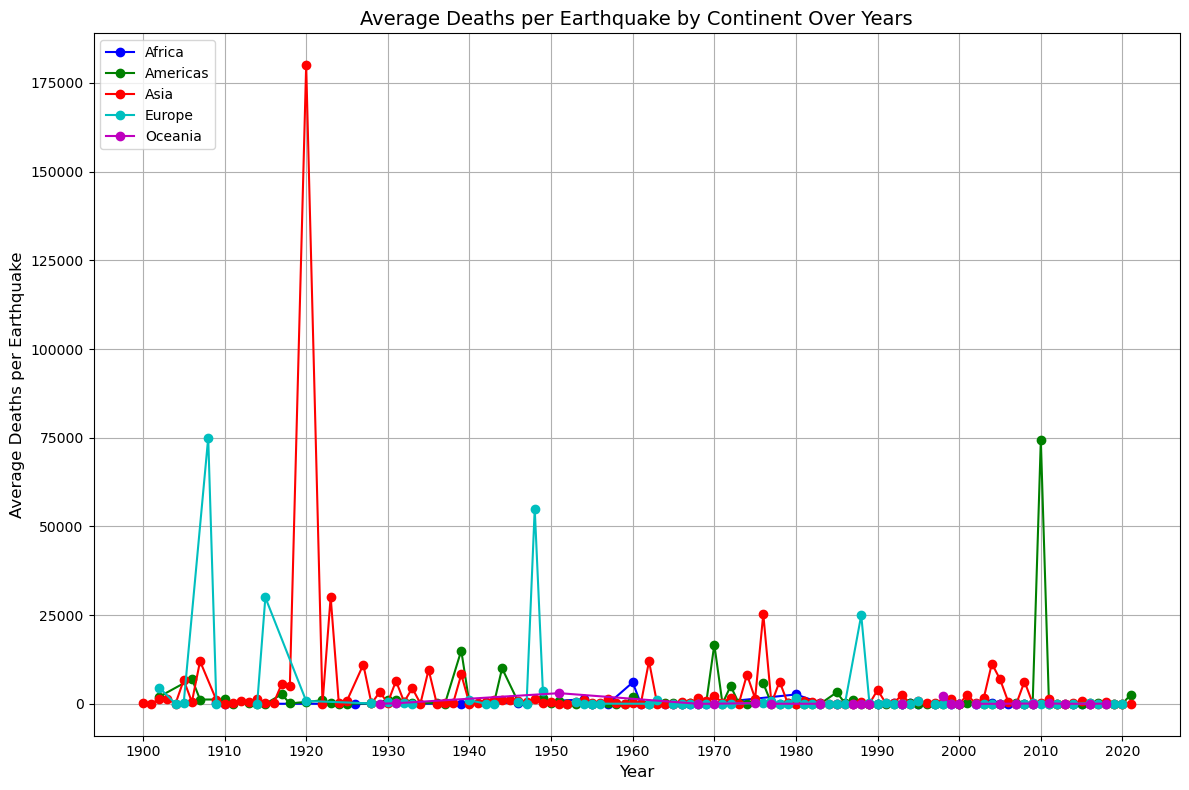

In [19]:
# Group by Continent and Year, calculate average Total Deaths per earthquake
avg_deaths_per_continent_year = read_file[read_file['Disaster Type'] == 'Earthquake'].groupby(['Continent', 'Year'])['Total Deaths'].mean().reset_index()

# Plotting average deaths per earthquake over years for each continent
plt.figure(figsize=(12, 8))

continents = avg_deaths_per_continent_year['Continent'].unique()
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Color for each continent

for i, continent in enumerate(continents):
    continent_data = avg_deaths_per_continent_year[avg_deaths_per_continent_year['Continent'] == continent]
    plt.plot(continent_data['Year'], continent_data['Total Deaths'], marker='o', linestyle='-', color=colors[i], label=continent)

# Customize plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Deaths per Earthquake', fontsize=12)
plt.title('Average Deaths per Earthquake by Continent Over Years', fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', fontsize='medium')

# Set x-axis ticks to show every 10 years
plt.xticks(range(min(avg_deaths_per_continent_year['Year']), max(avg_deaths_per_continent_year['Year']) + 1, 10))

# Show plot
plt.tight_layout()
plt.show()
#add also in graph boxplit

In [20]:
# Assuming read_file is your DataFrame
full_fields_count = read_file['Total Damages (\'000 US$)'].notnull().sum()
print("Number of full fields in 'Total Damages (\'000 US$)':", full_fields_count)


Number of full fields in 'Total Damages ('000 US$)': 5245


<Axes: xlabel='Continent', ylabel='Total Deaths'>

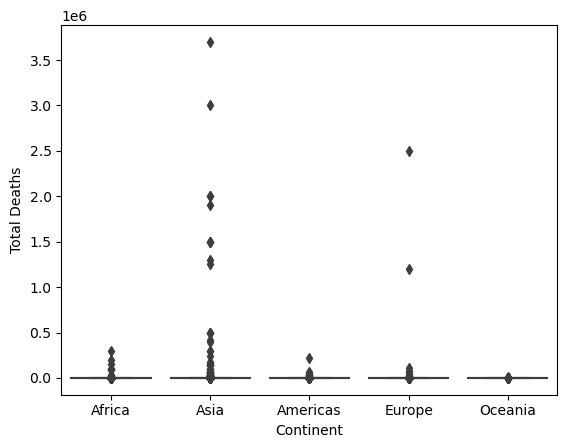

In [21]:
sns.boxplot(x=read_file['Continent'], y=read_file['Total Deaths'])

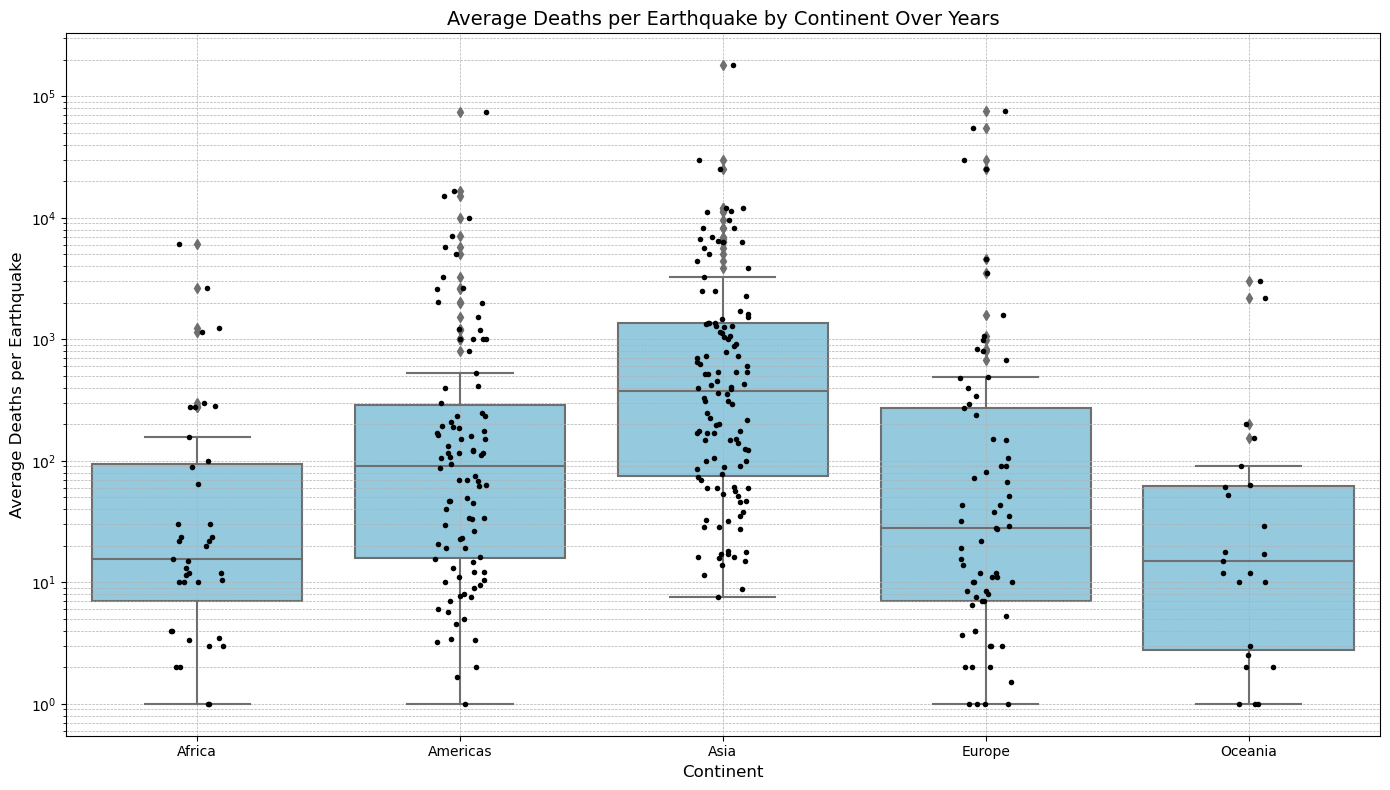

In [22]:
# Filter the data for earthquakes
earthquake_data = read_file[read_file['Disaster Type'] == 'Earthquake']

# Group by Continent and Year, calculate average Total Deaths
avg_deaths_per_continent_year = earthquake_data.groupby(['Continent', 'Year'])['Total Deaths'].mean().reset_index()

# Set up the figure
plt.figure(figsize=(14, 8))

# Create a boxplot with scatter overlay
sns.boxplot(x='Continent', y='Total Deaths', data=avg_deaths_per_continent_year, color='skyblue')
sns.stripplot(x='Continent', y='Total Deaths', data=avg_deaths_per_continent_year, color='black', size=4, jitter=True)

# Customize plot
plt.yscale('log')
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Average Deaths per Earthquake', fontsize=12)
plt.title('Average Deaths per Earthquake by Continent Over Years', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()